In [1]:
%matplotlib inline

# StackingRegressor

An ensemble-learning meta-regressor for stacking regression

> from mlxtend.regressor import StackingRegressor

## Overview

Stacking regression is an ensemble learning technique to combine multiple regression models via a meta-regressor. The individual regression models are trained based on the complete training set; then, the meta-regressor is fitted based on the outputs -- meta-features -- of the individual regression models in the ensemble.

![](./StackingRegressor_files/stackingregression_overview.png)

### References


- Breiman, Leo. "[Stacked regressions.](http://link.springer.com/article/10.1023/A:1018046112532#page-1)" Machine learning 24.1 (1996): 49-64.

## Example 1 - Simple Stacked Regression

In [2]:
from mlxtend.regressor import StackingRegressor
from mlxtend.data import boston_housing_data
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import numpy as np
import warnings

warnings.simplefilter('ignore')

# Generating a sample dataset
np.random.seed(1)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - np.random.rand(8))

Mean Squared Error: 0.2039
Variance Score: 0.7049


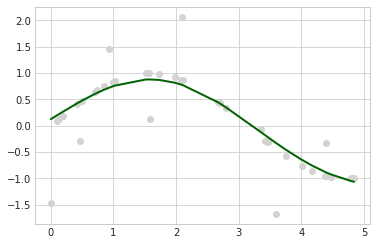

In [3]:
# Initializing models

lr = LinearRegression()
svr_lin = SVR(kernel='linear')
ridge = Ridge(random_state=1)
svr_rbf = SVR(kernel='rbf')

stregr = StackingRegressor(regressors=[svr_lin, lr, ridge], 
                           meta_regressor=svr_rbf)

# Training the stacking classifier

stregr.fit(X, y)
stregr.predict(X)

# Evaluate and visualize the fit

print("Mean Squared Error: %.4f"
      % np.mean((stregr.predict(X) - y) ** 2))
print('Variance Score: %.4f' % stregr.score(X, y))

with plt.style.context(('seaborn-whitegrid')):
    plt.scatter(X, y, c='lightgray')
    plt.plot(X, stregr.predict(X), c='darkgreen', lw=2)

plt.show()

In [4]:
stregr

StackingRegressor(meta_regressor=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
         refit=True,
         regressors=[SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False), LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False), Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=1, solver='auto', tol=0.001)],
         store_train_meta_features=False, use_features_in_secondary=False,
         verbose=0)

## Example 2 - Stacked Regression and GridSearch

In this second example we demonstrate how `StackingCVRegressor` works in combination with `GridSearchCV`. The stack still allows tuning hyper parameters of the base and meta models!

For instance, we can use `estimator.get_params().keys()` to get a full list of tunable parameters.

In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

# Initializing models

lr = LinearRegression()
svr_lin = SVR(kernel='linear')
ridge = Ridge(random_state=1)
lasso = Lasso(random_state=1)
svr_rbf = SVR(kernel='rbf')
regressors = [svr_lin, lr, ridge, lasso]
stregr = StackingRegressor(regressors=regressors, 
                           meta_regressor=svr_rbf)

params = {'lasso__alpha': [0.1, 1.0, 10.0],
          'ridge__alpha': [0.1, 1.0, 10.0],
          'svr__C': [0.1, 1.0, 10.0],
          'meta_regressor__C': [0.1, 1.0, 10.0, 100.0],
          'meta_regressor__gamma': [0.1, 1.0, 10.0]}

grid = GridSearchCV(estimator=stregr, 
                    param_grid=params, 
                    cv=5,
                    refit=True)
grid.fit(X, y)

print("Best: %f using %s" % (grid.best_score_, grid.best_params_))

Best: -0.082505 using {'lasso__alpha': 0.1, 'meta_regressor__C': 1.0, 'meta_regressor__gamma': 1.0, 'ridge__alpha': 0.1, 'svr__C': 10.0}


In [6]:
cv_keys = ('mean_test_score', 'std_test_score', 'params')

for r, _ in enumerate(grid.cv_results_['mean_test_score']):
    print("%0.3f +/- %0.2f %r"
          % (grid.cv_results_[cv_keys[0]][r],
             grid.cv_results_[cv_keys[1]][r] / 2.0,
             grid.cv_results_[cv_keys[2]][r]))
    if r > 10:
        break
print('...')

print('Best parameters: %s' % grid.best_params_)
print('Accuracy: %.2f' % grid.best_score_)

-9.810 +/- 6.86 {'lasso__alpha': 0.1, 'meta_regressor__C': 0.1, 'meta_regressor__gamma': 0.1, 'ridge__alpha': 0.1, 'svr__C': 0.1}
-9.591 +/- 6.67 {'lasso__alpha': 0.1, 'meta_regressor__C': 0.1, 'meta_regressor__gamma': 0.1, 'ridge__alpha': 0.1, 'svr__C': 1.0}
-9.591 +/- 6.67 {'lasso__alpha': 0.1, 'meta_regressor__C': 0.1, 'meta_regressor__gamma': 0.1, 'ridge__alpha': 0.1, 'svr__C': 10.0}
-9.819 +/- 6.87 {'lasso__alpha': 0.1, 'meta_regressor__C': 0.1, 'meta_regressor__gamma': 0.1, 'ridge__alpha': 1.0, 'svr__C': 0.1}
-9.600 +/- 6.68 {'lasso__alpha': 0.1, 'meta_regressor__C': 0.1, 'meta_regressor__gamma': 0.1, 'ridge__alpha': 1.0, 'svr__C': 1.0}
-9.600 +/- 6.68 {'lasso__alpha': 0.1, 'meta_regressor__C': 0.1, 'meta_regressor__gamma': 0.1, 'ridge__alpha': 1.0, 'svr__C': 10.0}
-9.878 +/- 6.91 {'lasso__alpha': 0.1, 'meta_regressor__C': 0.1, 'meta_regressor__gamma': 0.1, 'ridge__alpha': 10.0, 'svr__C': 0.1}
-9.665 +/- 6.71 {'lasso__alpha': 0.1, 'meta_regressor__C': 0.1, 'meta_regressor__gamma'

Mean Squared Error: 0.1844
Variance Score: 0.7331


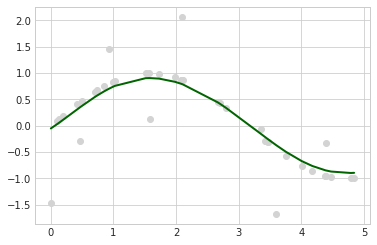

In [7]:
# Evaluate and visualize the fit
print("Mean Squared Error: %.4f"
      % np.mean((grid.predict(X) - y) ** 2))
print('Variance Score: %.4f' % grid.score(X, y))

with plt.style.context(('seaborn-whitegrid')):
    plt.scatter(X, y, c='lightgray')
    plt.plot(X, grid.predict(X), c='darkgreen', lw=2)

plt.show()

**Note**

The `StackingCVRegressor` also enables grid search over the `regressors` and even a single base regressor. When there are level-mixed hyperparameters, `GridSearchCV` will try to replace hyperparameters in a top-down order, i.e., `regressors` -> single base regressor -> regressor hyperparameter. For instance, given a hyperparameter grid such as

    params = {'randomforestregressor__n_estimators': [1, 100],
    'regressors': [(regr1, regr1, regr1), (regr2, regr3)]}
    
it will first use the instance settings of either `(regr1, regr2, regr3)` or `(regr2, regr3)` . Then it will replace the `'n_estimators'` settings for a matching regressor based on `'randomforestregressor__n_estimators': [1, 100]`.

## API

In [1]:
with open('../../api_modules/mlxtend.regressor/StackingRegressor.md', 'r') as f:
    print(f.read())

## StackingRegressor

*StackingRegressor(regressors, meta_regressor, verbose=0, use_features_in_secondary=False, store_train_meta_features=False, refit=True)*

A Stacking regressor for scikit-learn estimators for regression.

**Parameters**

- `regressors` : array-like, shape = [n_regressors]

    A list of regressors.
    Invoking the `fit` method on the `StackingRegressor` will fit clones
    of those original regressors that will
    be stored in the class attribute
    `self.regr_`.

- `meta_regressor` : object

    The meta-regressor to be fitted on the ensemble of
    regressors

- `verbose` : int, optional (default=0)

    Controls the verbosity of the building process.
    - `verbose=0` (default): Prints nothing
    - `verbose=1`: Prints the number & name of the regressor being fitted
    - `verbose=2`: Prints info about the parameters of the
    regressor being fitted
    - `verbose>2`: Changes `verbose` param of the underlying regressor to
    self.verbose - 2

- `use_feature